In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot

In [7]:
# Importing the dataset  
dataset = pd.read_csv('data.csv')
dataset.drop(dataset.index[dataset['game'] == 'Alternating'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Divided'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Focused'], inplace = True)
dataset.drop(dataset.index[dataset['game'] == 'Sustained'], inplace = True)
display(dataset)
# statistics of the data
# dataset.describe()

,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,oer,cer,game
160,161,1,4,8,8,0,0,0,3459,No,100.000000,0.000000,0.0,Selective
161,162,2,4,6,6,0,0,0,3000,No,100.000000,0.000000,0.0,Selective
162,163,2,4,6,6,0,0,0,10888,No,100.000000,0.000000,0.0,Selective
163,164,2,4,6,6,0,0,0,7081,No,100.000000,0.000000,0.0,Selective
164,165,2,4,7,6,0,1,0,9953,No,85.714286,14.285714,0.0,Selective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,320,1,7,8,8,0,0,0,12332,No,100.000000,0.000000,0.0,Selective
320,321,1,7,6,0,3,6,0,8190,No,0.000000,100.000000,50.0,Selective
321,322,1,7,7,5,0,2,0,6749,No,71.428571,28.571429,0.0,Selective
322,323,1,7,7,7,0,0,0,7795,No,100.000000,0.000000,0.0,Selective


In [8]:
x = dataset.iloc[:, [2, 8]].values  
display(x)

array([[    4,  3459],
       [    4,  3000],
       [    4, 10888],
       [    4,  7081],
       [    4,  9953],
       [    4, 14207],
       [    4, 14036],
       [    4, 12646],
       [    4,  7251],
       [    4, 10026],
       [    4, 11482],
       [    4, 12086],
       [    4, 10816],
       [    4,  6345],
       [    4, 11201],
       [    4, 10236],
       [    4, 10830],
       [    4, 10348],
       [    4, 16222],
       [    4, 10595],
       [    4, 13987],
       [    4, 15440],
       [    4, 22296],
       [    4, 11724],
       [    4, 12248],
       [    4, 11101],
       [    4, 11191],
       [    4, 13694],
       [    4,  3231],
       [    4,  9907],
       [    4, 11292],
       [    4, 17495],
       [    4, 11627],
       [    4, 23274],
       [    4,  6276],
       [    4,  7853],
       [    4,  8574],
       [    4,  7801],
       [    4,  8413],
       [    4,  8300],
       [    4, 15645],
       [    4, 14987],
       [    4, 18248],
       [   

In [9]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(x).describe()

display(x)

array([[-1.08800186e+00, -1.42198814e+00],
       [-1.08800186e+00, -1.49278251e+00],
       [-1.08800186e+00, -2.76168192e-01],
       [-1.08800186e+00, -8.63345004e-01],
       [-1.08800186e+00, -4.20378940e-01],
       [-1.08800186e+00,  2.35741406e-01],
       [-1.08800186e+00,  2.09367034e-01],
       [-1.08800186e+00, -5.02113725e-03],
       [-1.08800186e+00, -8.37124867e-01],
       [-1.08800186e+00, -4.09119705e-01],
       [-1.08800186e+00, -1.84551951e-01],
       [-1.08800186e+00, -9.13933502e-02],
       [-1.08800186e+00, -2.87273190e-01],
       [-1.08800186e+00, -9.76862769e-01],
       [-1.08800186e+00, -2.27892294e-01],
       [-1.08800186e+00, -3.76730125e-01],
       [-1.08800186e+00, -2.85113885e-01],
       [-1.08800186e+00, -3.59455683e-01],
       [-1.08800186e+00,  5.46527137e-01],
       [-1.08800186e+00, -3.21359367e-01],
       [-1.08800186e+00,  2.01809466e-01],
       [-1.08800186e+00,  4.25914511e-01],
       [-1.08800186e+00,  1.48335718e+00],
       [-1.

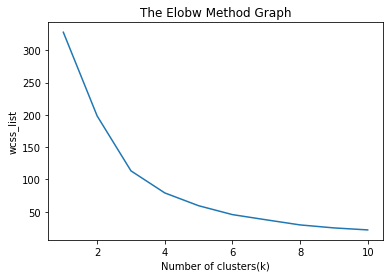

In [10]:
# Finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 2 2 2 2 2 0 2 0 2 0 0 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


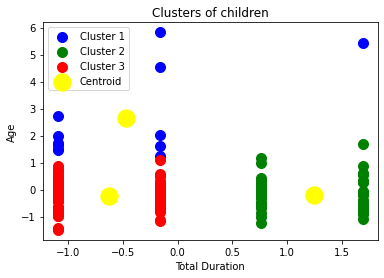

In [11]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
print(y_predict)

#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster    
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of children')  
mtp.xlabel('Total Duration')  
mtp.ylabel('Age')  
mtp.legend()  
mtp.show()  

In [13]:
new_df = dataset.iloc[:, [2, 8]].copy()
new_df['clusters'] = y_predict
new_df.head()
display(new_df)

,child_age,total_duration,clusters
160,4,3459,2
161,4,3000,2
162,4,10888,2
163,4,7081,2
164,4,9953,2
...,...,...,...
319,7,12332,1
320,7,8190,1
321,7,6749,1
322,7,7795,1


# Cluster Analysis

## Cluster 1

In [14]:
len(new_df[new_df["clusters"] == 0])

12

In [15]:
cluster_1 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_1['total_duration'].max()
minVal = cluster_1['total_duration'].min()

print(minVal)
print(maxVal)

20664
50461


,child_age,total_duration,clusters
182,4,22296,0
193,4,23274,0
205,4,30387,0
207,4,23988,0
209,4,25561,0
210,4,22375,0
216,5,20664,0
217,5,23106,0
264,5,25719,0
265,5,50461,0


<AxesSubplot:>

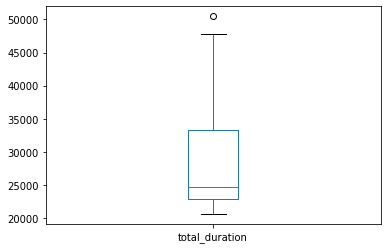

In [16]:
display(cluster_1)
cluster_1.boxplot(column =['total_duration'], grid = False)

## Cluster 2

In [17]:
len(new_df[new_df["clusters"] == 1])

54

In [18]:
cluster_2 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_2['total_duration'].max()
minVal = cluster_2['total_duration'].min()

print(minVal)
print(maxVal)

4780
23689


,child_age,total_duration,clusters
269,6,6202,1
270,6,4780,1
271,6,19055,1
272,6,7026,1
273,6,11709,1
274,6,10688,1
275,6,14634,1
276,6,13861,1
277,6,12183,1
278,6,15429,1


<AxesSubplot:>

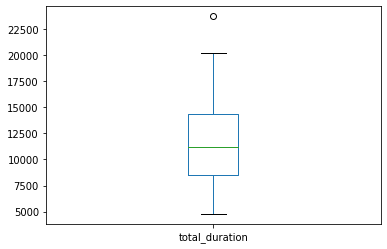

In [19]:
display(cluster_2)
cluster_2.sort_values('total_duration')
cluster_2.boxplot(column =['total_duration'], grid = False)

## Cluster 3

In [20]:
len(new_df[new_df["clusters"] == 2])

98

In [21]:
cluster_3 = new_df[new_df["clusters"] == 2 ]

maxVal = cluster_3['total_duration'].max()
minVal = cluster_3['total_duration'].min()

print(minVal)
print(maxVal)

3000
19886


,child_age,total_duration,clusters
160,4,3459,2
161,4,3000,2
162,4,10888,2
163,4,7081,2
164,4,9953,2
...,...,...,...
261,5,9059,2
262,5,10000,2
263,5,12889,2
266,5,19886,2


<AxesSubplot:>

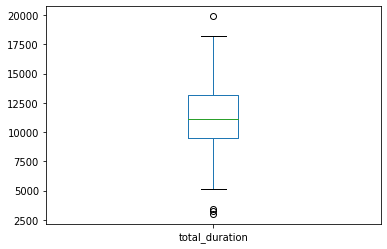

In [22]:
display(cluster_3)
cluster_3.sort_values('total_duration')
cluster_3.boxplot(column =['total_duration'], grid = False)

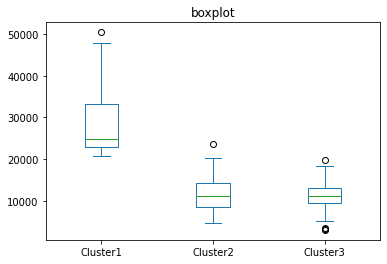

In [23]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_1['total_duration'], "Cluster2": cluster_2['total_duration'], "Cluster3": cluster_3['total_duration']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()